In [92]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
# getting housing data
housing_data = pd.read_csv('datasets/housing.csv')
# getting top 5 records of data
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12351,-116.52,33.81,12.0,12396.0,2552.0,2548.0,1265.0,3.4394,162200.0,INLAND
20444,-118.90,34.30,13.0,5591.0,1013.0,3188.0,971.0,5.5925,208600.0,<1H OCEAN
13549,-117.31,34.13,36.0,1076.0,283.0,773.0,224.0,2.6307,66400.0,INLAND
7442,-118.20,33.94,43.0,1934.0,511.0,1895.0,493.0,2.5029,159700.0,<1H OCEAN
15591,-116.34,33.36,24.0,2746.0,514.0,731.0,295.0,3.3214,176400.0,INLAND


In [94]:
# getting shape
housing_data.shape

(20640, 10)

In [95]:
# cleaning data missing value
housing_data = housing_data.dropna()
# getting shape after cleaning
housing_data.shape

(20433, 10)

In [96]:
# getting count of data having outliers or skewed dataset
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [97]:
# dropping these skewed data accumulated at cap of dataset
housing_data = housing_data.drop(
               housing_data.loc[housing_data['median_house_value'] == 500001].index
)

In [98]:
# getting shape after cleaning skew dataset
housing_data.shape

(19475, 10)

In [99]:
# showing data
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [100]:
# getting categorical colummn data
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [101]:
# converting it to numerical data by using one-hot encoding
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [102]:
# getting shape
housing_data.shape
# columns increased from 10 to 14

(19475, 14)

In [103]:
# displaying data
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
691,-122.12,37.69,35.0,2681.0,508.0,1580.0,536.0,4.1042,179100.0,0,0,0,1,0
14378,-117.28,32.73,44.0,1934.0,325.0,783.0,316.0,4.8684,358600.0,0,0,0,0,1
7028,-118.09,33.95,36.0,1991.0,396.0,1306.0,403.0,4.5000,166600.0,1,0,0,0,0
15170,-117.07,33.01,25.0,2120.0,381.0,588.0,359.0,3.1187,169400.0,1,0,0,0,0
19705,-121.66,39.09,27.0,2098.0,372.0,1090.0,333.0,4.4500,96200.0,0,1,0,0,0


In [104]:
# storing data in other dataframe for training it
X = housing_data.drop('median_house_value', axis=1)
Y = housing_data['median_house_value']

In [105]:
# getting columns
print('Columns in X :', X.columns)

Columns in X : Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [106]:
# spliting data into test and train dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [107]:
# getting shape of training and test data
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [108]:
# getting shape of training and test data
y_train.shape, y_test.shape

((15580,), (3895,))

In [109]:
# selecting training model and fitting data into it
from sklearn.linear_model import LinearRegression
# invoking method and fitting the data in model for training
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [110]:
# getting R-Sqaure that is how best the line fit into the data
print('Training R-Score :', linear_model.score(x_train, y_train))

Training R-Score : 0.610829773665803


In [111]:
# assigning columns name to predictors for making prediction
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [112]:
# getting coefficient of the data predictors
predictors_coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(predictors_coef)

ocean_proximity_INLAND        -26056.999901
longitude                     -23661.466066
latitude                      -21832.379040
population                       -31.057608
total_rooms                       -7.405876
households                        48.784674
total_bedrooms                    89.136888
housing_median_age               908.444223
ocean_proximity_NEAR BAY        6264.579408
ocean_proximity_<1H OCEAN      13533.284223
ocean_proximity_NEAR OCEAN     16854.380213
median_income                  38311.733601
ocean_proximity_ISLAND        124457.809218
dtype: float64


In [113]:
# predicting the y using x_test
y_pred = linear_model.predict(x_test)

In [114]:
# converting into dataframe
df_actual_predict = pd.DataFrame({'predicted':y_pred, 'actual':y_test})
df_actual_predict.head(10)

,predicted,actual
1041,132757.300738,99100.0
4088,270138.547840,425900.0
18482,207068.233011,350000.0
12983,188479.496731,140600.0
19776,55569.492438,79800.0
17429,227695.833013,134700.0
10530,201531.981774,119900.0
3350,24331.166593,118300.0
7871,258905.786113,179600.0
15446,163431.081611,159400.0


In [115]:
# evaluating our model
from sklearn.metrics import r2_score
print('R Score :', r2_score(y_test, y_pred))

R Score : 0.6206763602982199


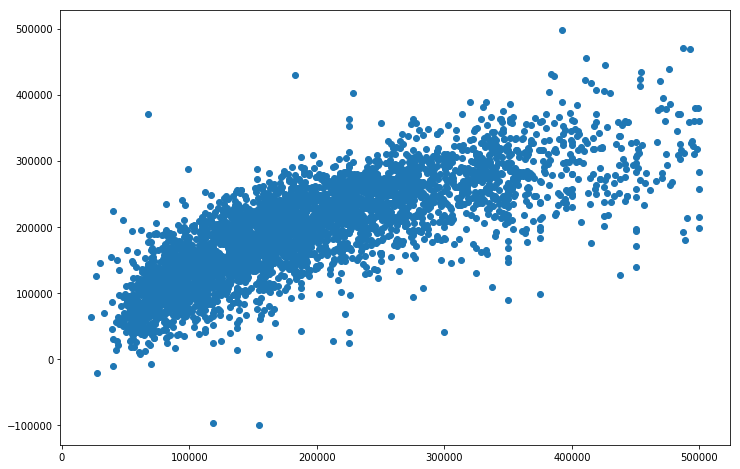

In [116]:
# visualizing data
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.show()

In [117]:
# evaluating model 
df_actual_predict_sample = df_actual_predict.sample(100)
df_actual_predict_sample = df_actual_predict_sample.reset_index()
df_actual_predict_sample.head()

,index,predicted,actual
0,19466,117020.854042,130300.0
1,12401,142502.771317,102600.0
2,12209,108832.346584,337200.0
3,1410,175097.348162,220800.0
4,5425,273538.593563,414100.0


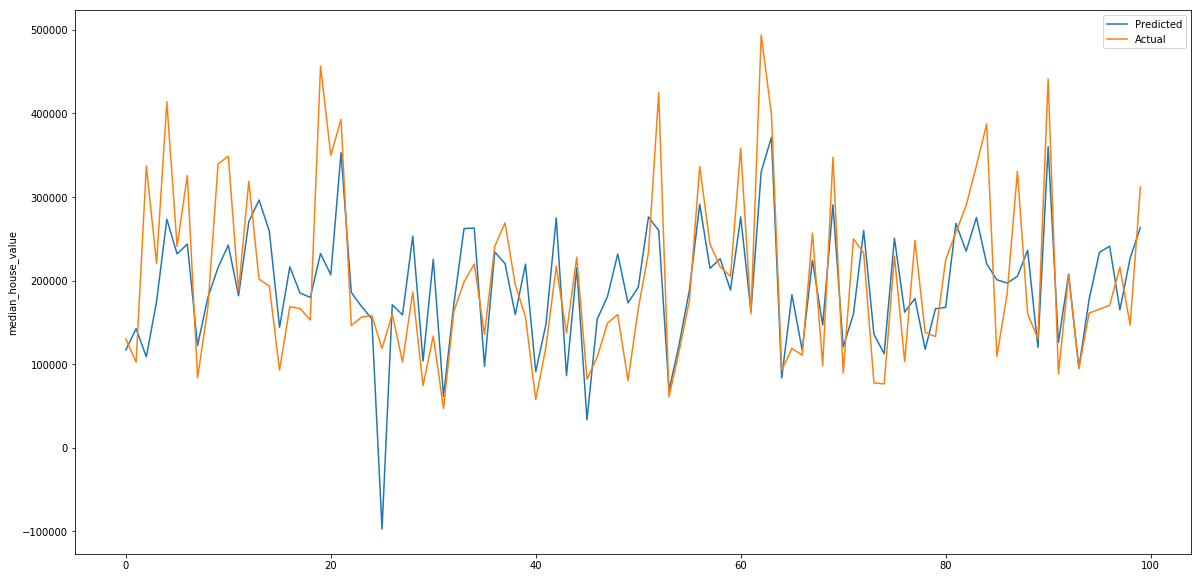

In [118]:
# visulaizing by line graph
plt.figure(figsize=(20, 10))
plt.plot(df_actual_predict_sample['predicted'], label='Predicted')
plt.plot(df_actual_predict_sample['actual'], label='Actual')
plt.ylabel('median_house_value')
plt.legend()
plt.show()